C:\Users\ravis\AppData\Local\Temp\ipykernel_17372\674191339.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
C:\Users\ravis\AppData\Local\Temp\ipykernel_17372\674191339.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
C:\Users\ravis\AppData\Local\Temp\ipykernel_17372\674191339.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:


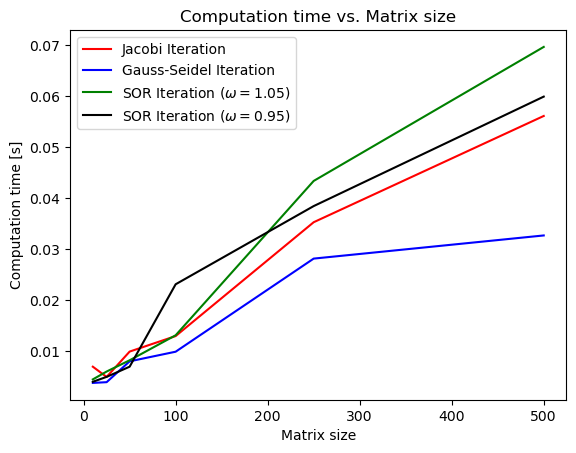

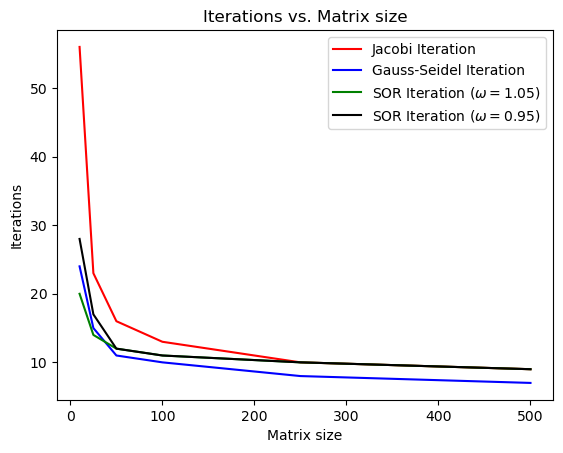

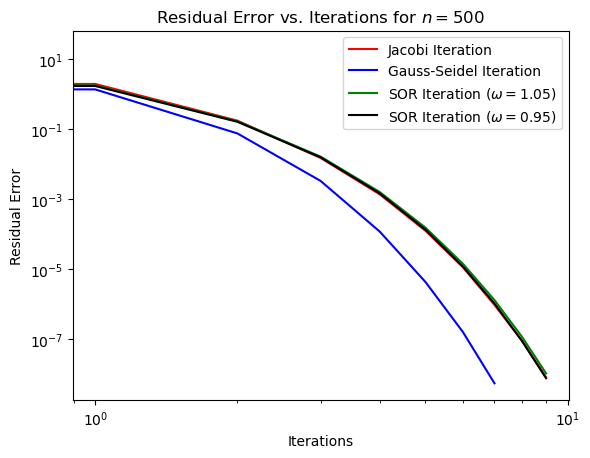

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import time

#initialize matrices
def matrix_init(n, test):
    #dimensions of matrices n
    if test == 1: #matrix from PS 2.3
        n = 3
        A = np.array([[4, 1, -1], [-1, 3, 1], [2, 2, 6]], dtype=np.float32)
        b = np.array([[5], [-4], [1]], dtype=np.float32)
    if test == 2: #A = n/2 * I + R
        A = n/2 * np.eye(n) + np.random.normal(size = (n, n))
        b = np.random.normal(size = (n, 1))
    if test == 3: #A = R
        A = np.random.normal(size = (n, n))
        b = np.random.normal(size = (n, 1))
    return A, b

epsilon = 1e-8 #tolerance, checked against absolute error

#jacobi iteration
def Jacobi(A, b, x_0, n): #based on algorithm 7.1
    #coefficient of unknowns matrix A, constants matrix b, initial guess x0, matrix size n
    x = x_0
    x_t = 1 + x_0
    x_arr = np.array([np.linalg.norm(np.matmul(A, x) - b)])
    i = 0
    while True:
        x_t = x.copy()
        i += 1
        for j in range(n):
            x_t[j] = 1/A[j][j] * (-1 * (np.dot(A[j, :j], x[:j]) + np.dot(A[j, j+1:], x[j+1:])) + b[j])
        if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
            x = x_t.copy()
            x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
            break
        x = x_t.copy()
        x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
    return x, i, x_arr

#gauss seidel iteration
def Gauss_Seidel(A, b, x_0, n): #based on algorithm 7.2
    #coefficient of unknowns matrix A, constants matrix b, initial guess x0, matrix size n
    x = x_0
    x_t = 1 + x_0
    x_arr = np.array([np.linalg.norm(np.matmul(A, x) - b)])
    i = 0
    while True:
        i += 1
        x_t = x.copy()
        for j in range(n):
            x_t[j] = 1/A[j][j] * (-1 * (np.dot(A[j, :j], x_t[:j]) + np.dot(A[j, j+1:], x[j+1:])) + b[j])
        if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
            x = x_t.copy()
            x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
            break
        x = x_t.copy()
        x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
    return x, i, x_arr

#SOR iteration
def SOR(A, b, omega, x_0, n): #based on algorithm 7.3
    #coefficient of unknowns matrix A, constants matrix b
    #initial guess x0, matrix size n, parameter omega
    x = x_0
    x_t = 1 + x_0
    x_arr = np.array([np.linalg.norm(np.matmul(A, x) - b)])
    i = 0
    while True:
        i += 1
        x_t = x.copy()
        for j in range(n):
            x_t[j] = (1 - omega) * x[j] + omega/A[j][j] * (-1 * (np.dot(A[j, :j], x_t[:j]) + np.dot(A[j, j+1:], x[j+1:])) + b[j])
        if np.abs(np.linalg.norm(x - x_t)/np.linalg.norm(x)) <= epsilon:
            x = x_t.copy()
            x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
            break
        x = x_t.copy()
        x_arr = np.append(x_arr, np.linalg.norm(np.matmul(A, x) - b))
    return x, i, x_arr

test = 2

if test == 1:
    n = 3
    omega = 1.1
    x_0 = np.zeros((n,1)) #initial guess
    A, b = matrix_init(n, test)
    
    x_jacobi, N_jacobi, x_arr_jacobi = Jacobi(A, b, x_0, n)
    x_gaussseidel, N_gaussseidel, x_arr_gaussseidel = Gauss_Seidel(A, b, x_0, n)
    x_SOR, N_SOR, x_arr_SOR = SOR(A, b, omega, x_0, n)
    
    print(x_jacobi, N_jacobi)
    print(x_gaussseidel, N_gaussseidel)
    print(x_SOR, N_SOR)
if test == 2:
    n_test = np.array([10, 25, 50, 100, 250, 500]) #test sizes of matrices
    time_jacobi = np.array([]) #computation time for jacobi iteration
    time_gaussseidel = np.array([]) #computation time for gauss seidel iteration
    time_SOR_105 = np.array([]) #computation time for SOR iteration (omega = 1.05)
    time_SOR_95 = np.array([]) #computation time for SOR iteration (omega = 0.95)
    N_jacobi = np.array([]) #iterations for jacobi iteration
    N_gaussseidel = np.array([]) #iterations for gauss seidel iteration
    N_SOR_105 = np.array([]) #iterations for SOR iteration (omega = 1.05)
    N_SOR_95 = np.array([]) #iterations for SOR iteration (omega = 0.95)
    for n in n_test:
        A, b = matrix_init(n, test)
        x_0 = np.zeros((n,1)) #initial guess

        t0_jacobi = time.time()
        x_jacobi, n_jacobi, x_arr_jacobi = Jacobi(A, b, x_0, n)
        t1_jacobi = time.time()
        time_jacobi = np.append(time_jacobi, t1_jacobi - t0_jacobi)
        N_jacobi = np.append(N_jacobi, n_jacobi)
        
        t0_gaussseidel = time.time()
        x_gaussseidel, n_gaussseidel, x_arr_gaussseidel = Gauss_Seidel(A, b, x_0, n)
        t1_gaussseidel = time.time()
        time_gaussseidel = np.append(time_gaussseidel, t1_gaussseidel - t0_gaussseidel)
        N_gaussseidel = np.append(N_gaussseidel, n_gaussseidel)
        
        omega = 1.05
        t0_SOR_105 = time.time()
        x_SOR_105, n_SOR_105, x_arr_SOR_105 = SOR(A, b, omega, x_0, n)
        t1_SOR_105 = time.time()
        time_SOR_105 = np.append(time_SOR_105, t1_SOR_105 - t0_SOR_105)
        N_SOR_105 = np.append(N_SOR_105, n_SOR_105)
        
        omega = 0.95
        t0_SOR_95 = time.time()
        x_SOR_95, n_SOR_95, x_arr_SOR_95 = SOR(A, b, omega, x_0, n)
        t1_SOR_95 = time.time()
        time_SOR_95 = np.append(time_SOR_95, t1_SOR_95 - t0_SOR_95)
        N_SOR_95 = np.append(N_SOR_95, n_SOR_95)

  
    plt.plot(n_test, time_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(n_test, time_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(n_test, time_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(n_test, time_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Matrix size")
    plt.ylabel("Computation time [s]")
    plt.title("Computation time vs. Matrix size")
    plt.legend()
    plt.show()
    
    plt.plot(n_test, N_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(n_test, N_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(n_test, N_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(n_test, N_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Matrix size")
    plt.ylabel("Iterations")
    plt.title("Iterations vs. Matrix size")
    plt.legend()
    plt.show()
    
    plt.plot(x_arr_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(x_arr_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(x_arr_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(x_arr_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Iterations")
    plt.ylabel("Residual Error")
    plt.title("Residual Error vs. Iterations for $n = 500$")
    plt.legend()
    plt.loglog()
    plt.show()
if test == 3:
    n_test = np.array([5, 10, 25, 50]) #test sizes of matrices
    time_jacobi = np.array([]) #computation time for jacobi iteration
    time_gaussseidel = np.array([]) #computation time for gauss seidel iteration
    time_SOR_105 = np.array([]) #computation time for SOR iteration (omega = 1.05)
    time_SOR_95 = np.array([]) #computation time for SOR iteration (omega = 0.95)
    N_jacobi = np.array([]) #iterations for jacobi iteration
    N_gaussseidel = np.array([]) #iterations for gauss seidel iteration
    N_SOR_105 = np.array([]) #iterations for SOR iteration (omega = 1.05)
    N_SOR_95 = np.array([]) #iterations for SOR iteration (omega = 0.95)
    for n in n_test:
        A, b = matrix_init(n, test)
        x_0 = np.zeros((n,1)) #initial guess

        t0_jacobi = time.time()
        x_jacobi, n_jacobi, x_arr_jacobi = Jacobi(A, b, x_0, n)
        t1_jacobi = time.time()
        time_jacobi = np.append(time_jacobi, t1_jacobi - t0_jacobi)
        N_jacobi = np.append(N_jacobi, n_jacobi)
        
        t0_gaussseidel = time.time()
        x_gaussseidel, n_gaussseidel, x_arr_gaussseidel = Gauss_Seidel(A, b, x_0, n)
        t1_gaussseidel = time.time()
        time_gaussseidel = np.append(time_gaussseidel, t1_gaussseidel - t0_gaussseidel)
        N_gaussseidel = np.append(N_gaussseidel, n_gaussseidel)
        
        omega = 1.05
        t0_SOR_105 = time.time()
        x_SOR_105, n_SOR_105, x_arr_SOR_105 = SOR(A, b, omega, x_0, n)
        t1_SOR_105 = time.time()
        time_SOR_105 = np.append(time_SOR_105, t1_SOR_105 - t0_SOR_105)
        N_SOR_105 = np.append(N_SOR_105, n_SOR_105)
        
        omega = 0.95
        t0_SOR_95 = time.time()
        x_SOR_95, n_SOR_95, x_arr_SOR_95 = SOR(A, b, omega, x_0, n)
        t1_SOR_95 = time.time()
        time_SOR_95 = np.append(time_SOR_95, t1_SOR_95 - t0_SOR_95)
        N_SOR_95 = np.append(N_SOR_95, n_SOR_95)

    
    plt.plot(n_test, time_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(n_test, time_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(n_test, time_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(n_test, time_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Matrix size")
    plt.ylabel("Computation time [s]")
    plt.title("Computation time vs. Matrix size")
    plt.legend()
    plt.show()
    
    plt.plot(n_test, N_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(n_test, N_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(n_test, N_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(n_test, N_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Matrix size")
    plt.ylabel("Iterations")
    plt.title("Iterations vs. Matrix size")
    plt.legend()
    plt.show()
    
    plt.plot(x_arr_jacobi, "r-", label="Jacobi Iteration")
    plt.plot(x_arr_gaussseidel, "b-", label="Gauss-Seidel Iteration")
    plt.plot(x_arr_SOR_105, "g-", label="SOR Iteration ($\omega = 1.05$)")
    plt.plot(x_arr_SOR_95, "k-", label="SOR Iteration ($\omega = 0.95$)")
    plt.xlabel("Iterations")
    plt.ylabel("Residual Error")
    plt.title("Residual Error vs. Iterations for $n = 500$")
    plt.legend()
    plt.loglog()
    plt.show()